<a href="https://colab.research.google.com/github/margaretmz/CVND-Facial-Keypoint-Detection/blob/master/0_Fashion_Product_Images_(Small)_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Product Images (Small) - Data Analysis

Written by Margaret Maynard-Reid, 6/13/2021

This notebook contains data exploration and visualization for Fashion Product Images, the small version: https://www.kaggle.com/paramaggarwal/fashion-product-images-small

We will mainly use Pandas to create dataframe on `styles.csv' file and analyze the data. 

>[Fashion Product Images (Small) - Data Analysis](#scrollTo=XpLDVadPBtBY)

>>[Imports](#scrollTo=aE-An1Tgz1g6)

>>[Download data from Kaggle](#scrollTo=2Snj--fSje9e)

>>[Chart utils](#scrollTo=bfT8gNFPXa_I)

>>[Create dataframe from csv file](#scrollTo=rqYeQt6Vja-o)

>>[Explore dataframe overall](#scrollTo=qgRNfHPQMbGp)

>>[Gender](#scrollTo=viWafjBrKeqM)

>>[Master Category](#scrollTo=AjhQEdaOKyKO)

>>[Sub category](#scrollTo=hD9_kLECLhAa)

>>[Master + Sub Category](#scrollTo=ikRmCvKdQiyT)

>>[Usage](#scrollTo=XZKNPYgfMNiq)



## Imports

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing import image 

In [4]:
# TensorFlow version in this notebook
tf.version.VERSION

'2.5.0'

## Download data from Kaggle
Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials. Now you can enter your username and key below to in order to download Kaggle data from Colab. 

In [5]:
os.environ['KAGGLE_USERNAME']="enter-your-own-user-name" #TODO: remove this before putting Colab on GitHub
os.environ['KAGGLE_KEY']="enter-your-own-user-name" #TODO: remove this before putting Colab on GitHub

In [6]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 98% 555M/565M [00:16<00:00, 34.0MB/s]
100% 565M/565M [00:16<00:00, 36.1MB/s]


In [7]:
!mkdir -p datasets

Unip data - styles.csv and the images

In [ ]:
# clear cell output
!unzip fashion-product-images-small.zip -d datasets/

## Chart utils
Here are two functions for making pie charts and bar charts.

In [45]:
def plot_pie_chart(values, labels, title):
  fig1, ax1 = plt.subplots()
  ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
  plt.title(title, size=14, pad=15)

  plt.show()

In [49]:
def plot_bar_chart(df, column, figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values, counts.index)
    plt.xlabel('Number of rows', size=14, labelpad=15)
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=15)
    plt.show()

## Create dataframe from csv file

In [50]:
# Create dataframe
fashion = pd.read_csv("datasets/styles.csv", error_bad_lines=False, warn_bad_lines=False)

## Explore dataframe overall

In [51]:
fashion.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


There are total of 44,424 images in the dataset with ten columns: id, gender, masterCategory, subCategory, articleType, baseColor, season, year, usage and productDisplayName.

In [52]:
fashion.describe(include='all')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44424.000000,44424,44424,44424,44424,44409,44403,44423.000000,44107,44417
unique,NaN,5,7,45,143,46,4,NaN,8,31121
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings
freq,NaN,22147,21397,15402,7067,9728,21472,NaN,34406,82
mean,29696.334301,NaN,NaN,NaN,NaN,NaN,NaN,2012.806497,NaN,NaN
std,17049.490518,NaN,NaN,NaN,NaN,NaN,NaN,2.126480,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14768.750000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28618.500000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44683.250000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


In [53]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


There aren't that many null values in the dataset. The 'usage' column has the most null values

In [54]:
# Sum null value counts by column
fashion.isnull().sum(axis = 0)

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

There are 7 products with no display name.

In [55]:
fashion.productDisplayName.isnull().sum()

7

Year 2012 has the largest number of fashion images in this dataset.

In [56]:
fashion.year.value_counts()

2012.0    16288
2011.0    13672
2016.0     6006
2017.0     2916
2015.0     2780
2013.0     1212
2010.0      846
2018.0      405
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64

## Gender

In [57]:
fashion.gender.value_counts()

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

## Master Category
There are 7 master categories in the dataframe. Notice that 'Free Items', 'Sporting Goods' and 'Home' have very few rows.

In [58]:
fashion.masterCategory.value_counts()

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

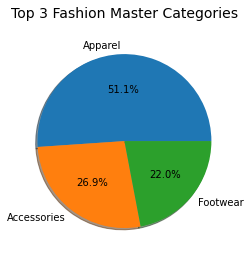

In [59]:
values = fashion.masterCategory.value_counts()[:3].values
labels = fashion.masterCategory.value_counts()[:3].index

plot_pie_chart(values, labels, "Top 3 Fashion Master Categories")

There is no null values in the masterCategory column

In [60]:
fashion.masterCategory.isnull().sum()

0

Take a look at a few rows where the master category is 'Footwear'

In [61]:
fashion[fashion['masterCategory']=='Footwear'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
10,9204,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2011.0,Casual,Puma Men Future Cat Remix SF Black Casual Shoes
12,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Fila Men Cush Flex Black Slippers
14,46885,Boys,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,2012.0,Casual,Ben 10 Boys Navy Blue Slippers
21,12967,Men,Footwear,Sandal,Sandals,Black,Fall,2011.0,Casual,ADIDAS Men Spry M Black Sandals
25,9036,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2011.0,Formal,Buckaroo Men Flores Black Formal Shoes


## Sub category

In [62]:
# Let's count number of rows per sub category
fashion.subCategory.value_counts()

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

There are total of 45 sub categories where 'Topwear' has 15402 images while quite a few sub categories only have a few images in them.

In [63]:
len(fashion.subCategory.value_counts())

45

In [64]:
# Top 20 sub categories
fashion.subCategory.value_counts()[:20]

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Name: subCategory, dtype: int64

Let's visualize the top 10 fashion sub categories:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


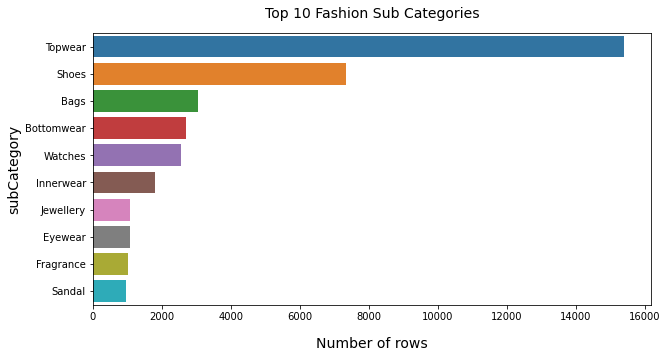

In [65]:
plot_bar_chart(fashion, column="subCategory", title="Top 10 Fashion Sub Categories")

## Master + Sub Category

In [40]:
fashion.groupby(['masterCategory','subCategory'])['id'].count()

masterCategory  subCategory             
Accessories     Accessories                   129
                Bags                         3055
                Belts                         811
                Cufflinks                     108
                Eyewear                      1073
                Gloves                         20
                Headwear                      293
                Jewellery                    1079
                Mufflers                       38
                Perfumes                        1
                Scarves                       118
                Shoe Accessories               24
                Socks                         686
                Sports Accessories              3
                Stoles                         90
                Ties                          258
                Umbrellas                       6
                Wallets                       933
                Watches                      2542
         

## Usage
The top usage of images from this dataset falls under 'Casual'.

In [ ]:
fashion.usage.value_counts()

Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

In [ ]:
fashion.usage.describe()

count      44107
unique         8
top       Casual
freq       34406
Name: usage, dtype: object